In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

In [9]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs detected: {len(gpus)}")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPUs detected.")

GPUs detected: 1


In [10]:
DATA = "./Dataset of Tomato Leaves/plantvillage"
#CLASS = ["Bacterial spot", "Black mold", "Gray spot", "health", "Late blight", "powdery mildew"]
CLASS = [
  "Bacterial_spot227",
  "Early_blight227",
  "healthy227",
  "Late_blight227",
  "Leaf_Mold227",
  "Septoria_leaf_spot227",
  "Target_Spot227",
  "Tomato_mosaic_virus227",
  "Tomato_Yellow_Leaf_Curl_Virus227",
  "Two-spotted_spider_mite227"
]
BATCH_SIZE = 16

In [11]:
datagenerator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.15  
)
train = datagenerator.flow_from_directory(
    DATA, 
    target_size=(224, 224), 
    batch_size=BATCH_SIZE, 
    class_mode='categorical', 
    classes=CLASS,  
    shuffle=False, 
    subset='training' 
)
test = datagenerator.flow_from_directory(
    DATA, 
    target_size=(224, 224), 
    batch_size=BATCH_SIZE, 
    class_mode='categorical', 
    classes=CLASS,  
    shuffle=False,  
    subset='validation' 
)

Found 12356 images belonging to 10 classes.
Found 2175 images belonging to 10 classes.


In [12]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
model = Model(inputs=base_model.input, outputs=x)

In [13]:
trainFeatures=model.predict(train, verbose =1)
trainLabels = train.classes

773/773 [==============================] - 504s 647ms/step


In [14]:
testFeatures=model.predict(test,verbose=1)
testLabels = test.classes

136/136 [==============================] - 95s 705ms/step


In [15]:
def performace_measure(model, testData, testLabel, model_name):
    predictedLabel = model.predict(testData)
    accuracy = accuracy_score(testLabel, predictedLabel)
    precision = precision_score(testLabel, predictedLabel, average= "weighted")
    recall = recall_score(testLabel, predictedLabel, average= "weighted")
    f1 = f1_score(testLabel, predictedLabel, average= "weighted")
    print(model_name)
    print(f"Accuracy: {accuracy*100}")
    print(f"Precision: {precision*100}")
    print(f"Recall: {recall*100}")
    print(f"F1 Score: {f1*100}")
    confustion_matrix = confusion_matrix(testLabel, predictedLabel)
    disp = ConfusionMatrixDisplay(confusion_matrix=confustion_matrix, display_labels=CLASS)
    fig, ax = plt.subplots(figsize=(10, 8))  
    disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
    plt.title(f"Confusion Matrix of {model_name}")
    plt.show()

K-Nearest Neighbour Classifier
Accuracy: 87.9080459770115
Precision: 88.29363396217649
Recall: 87.9080459770115
F1 Score: 87.71760586679197


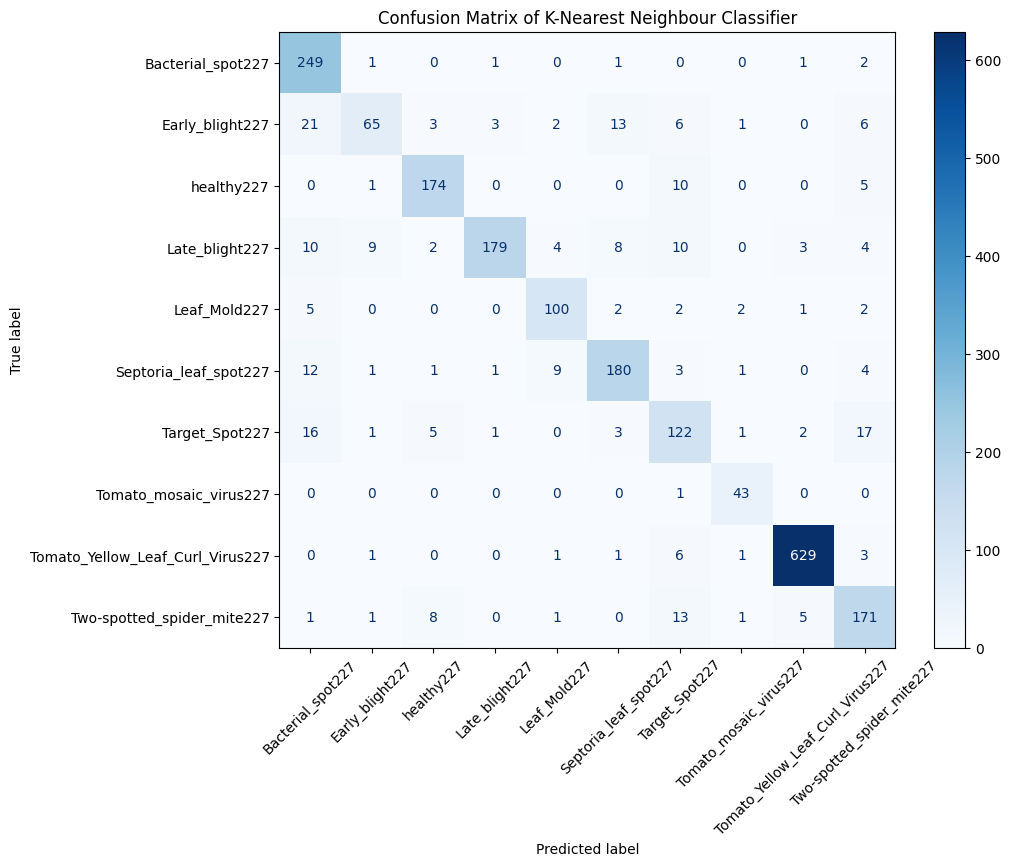

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainFeatures, trainLabels)
performace_measure(knn, testFeatures, testLabels, "K-Nearest Neighbour Classifier")

Random Forest Classifier
Accuracy: 90.02298850574712
Precision: 90.05348887586192
Recall: 90.02298850574712
F1 Score: 89.58114317700043


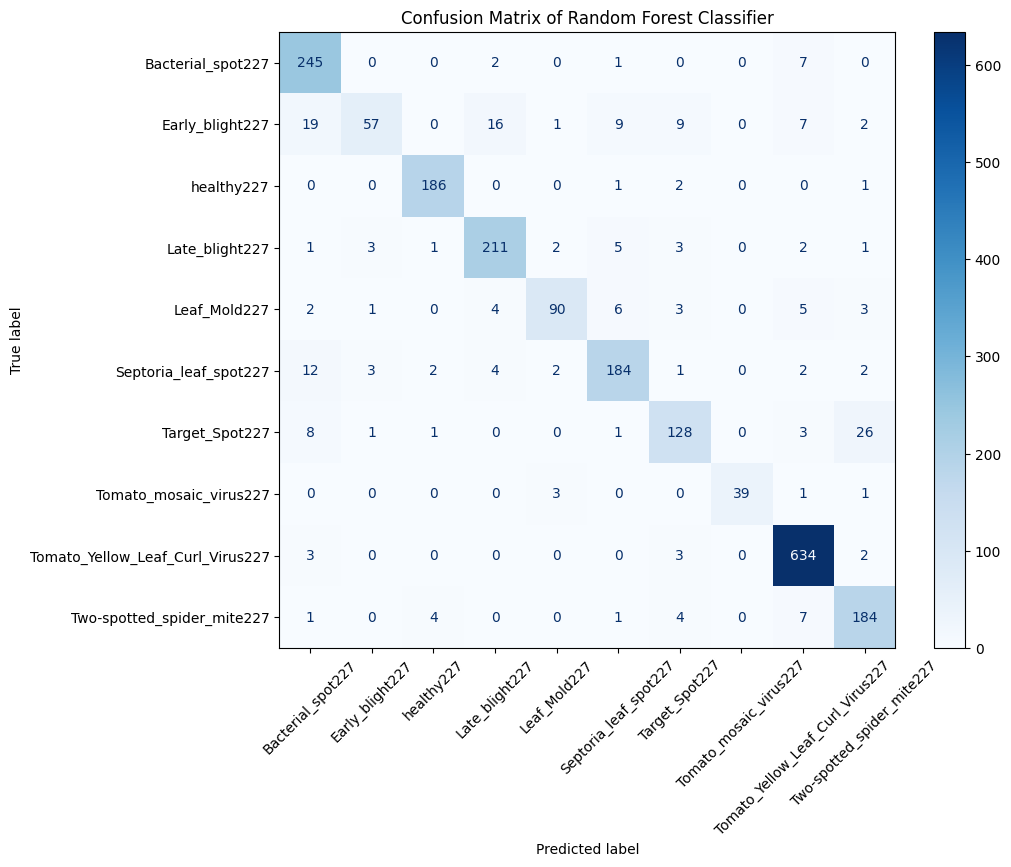

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainFeatures, trainLabels)
performace_measure(rf, testFeatures, testLabels, "Random Forest Classifier")

Multiple Perceptron Classifier
Accuracy: 95.40229885057471
Precision: 95.3793925806316
Recall: 95.40229885057471
F1 Score: 95.36162987926768


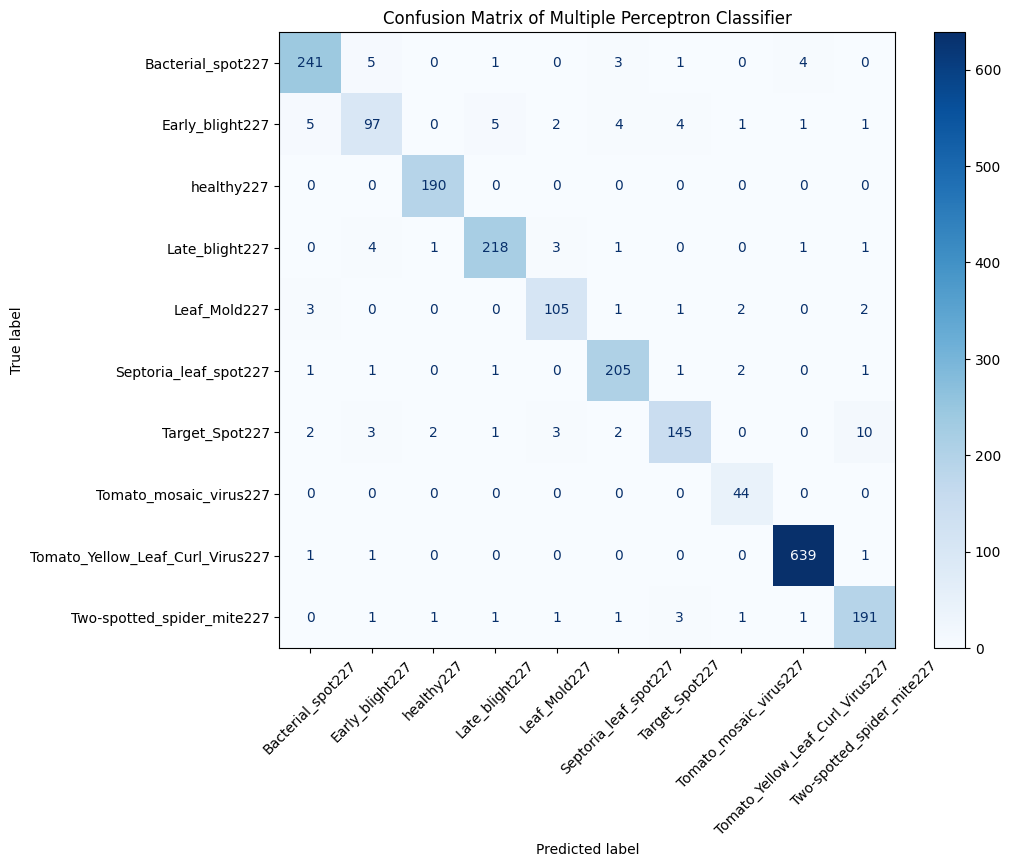

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=1000)
mlp.fit(trainFeatures, trainLabels)
performace_measure(mlp, testFeatures, testLabels, "Multiple Perceptron Classifier")

c:\Users\Faysal Ahmmed\.conda\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261120
[LightGBM] [Info] Number of data points in the train set: 12356, number of used features: 1024
[LightGBM] [Info] Start training from score -2.144649
[LightGBM] [Info] Start training from score -2.899804
[LightGBM] [Info] Start training from score -2.435331
[LightGBM] [Info] Start training from score -2.252547
[LightGBM] [Info] Start training from score -2.948006
[LightGBM] [Info] Start training from score -2.327662
[LightGBM] [Info] Start training from score -2.559139
[LightGBM] [Info] Start training from score -3.880634
[LightGBM] [Info] Start training from score -1.221060
[LightGBM] [Info] Start training from score -2.383114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

c:\Users\Faysal Ahmmed\.conda\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Light Gradient Boosting Classifier
Accuracy: 95.49425287356323
Precision: 95.52285856867572
Recall: 95.49425287356323
F1 Score: 95.4319914982459


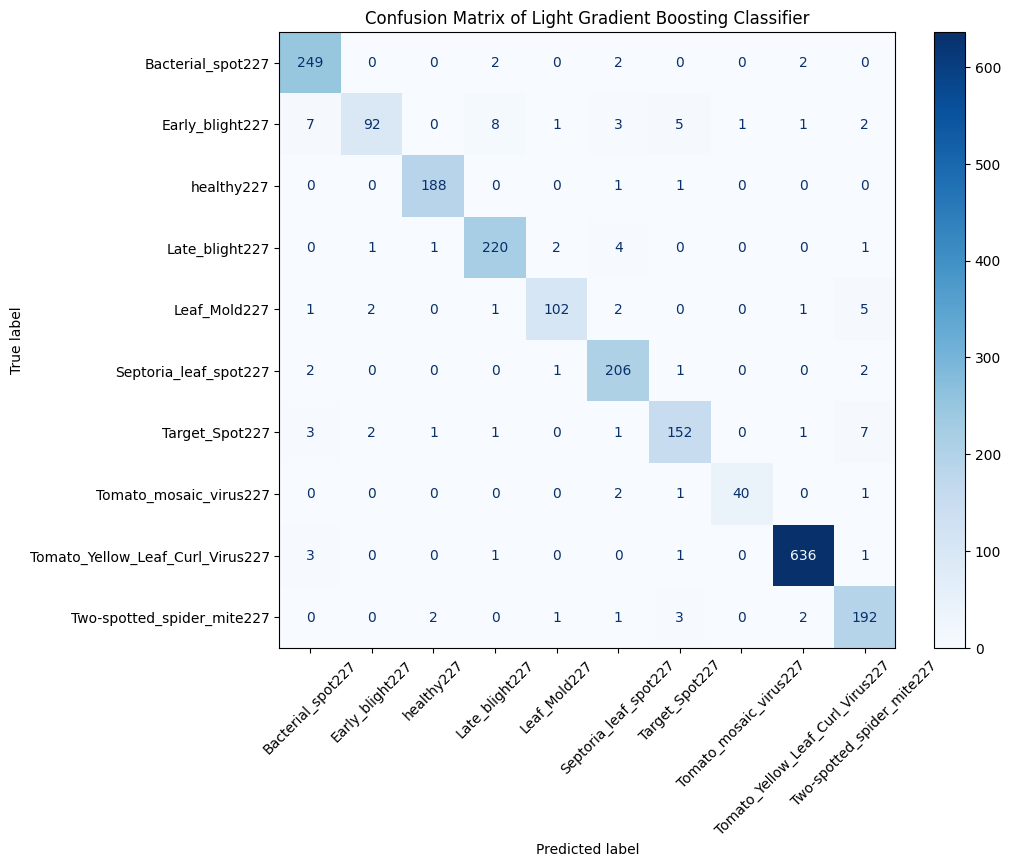

In [19]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm.fit(trainFeatures, trainLabels)
performace_measure(lgbm, testFeatures, testLabels, "Light Gradient Boosting Classifier")

Support Vector Machine Classifier
Accuracy: 94.16091954022988
Precision: 94.13928952735738
Recall: 94.16091954022988
F1 Score: 94.0970546282399


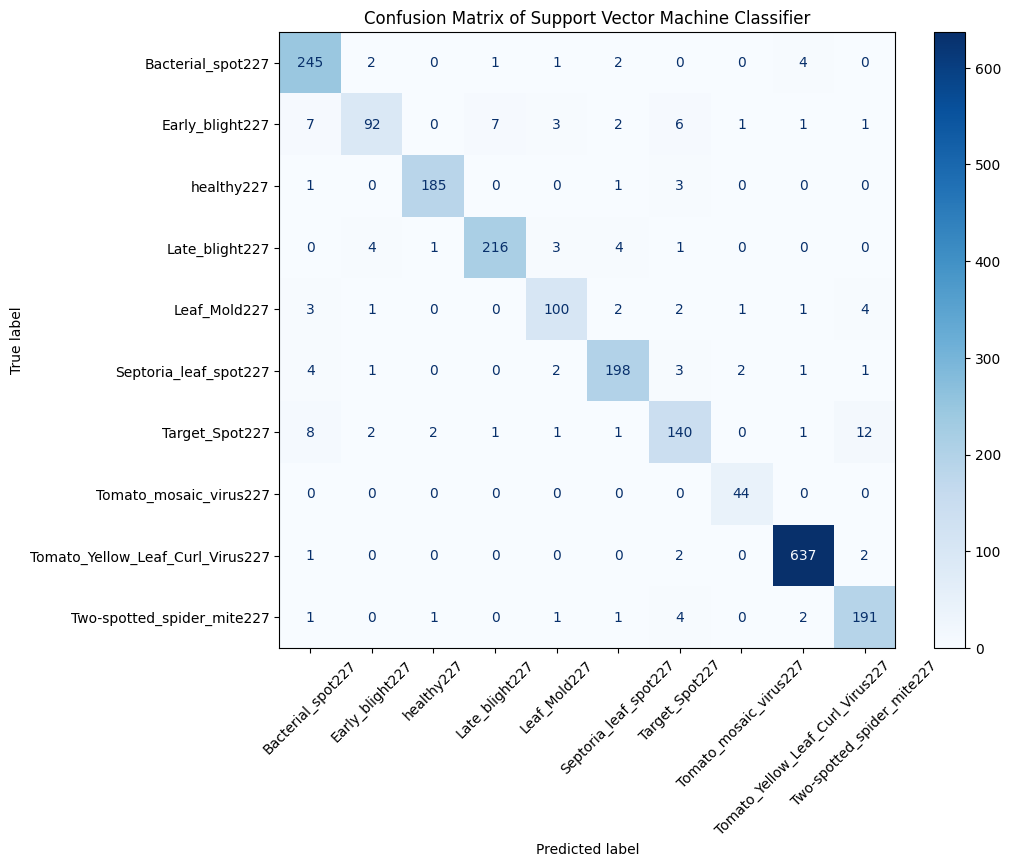

In [20]:
svm = SVC(kernel='rbf', probability=True)  
svm.fit(trainFeatures, trainLabels)
performace_measure(svm, testFeatures, testLabels, "Support Vector Machine Classifier")

c:\Users\Faysal Ahmmed\.conda\envs\py310\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\Faysal Ahmmed\.conda\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.347629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261120
[LightGBM] [Info] Number of data points in the train set: 12356, number of used features: 1024
[LightGBM] [Info] Start training from score -2.144649
[LightGBM] [Info] Start training from score -2.899804
[LightGBM] [Info] Start training from score -2.435331
[LightGBM] [Info] Start training from score -2.252547
[LightGBM] [Info] Start training from score -2.948006
[LightGBM] [Info] Start training from score -2.327662
[LightGBM] [Info] Start training from score -2.559139
[LightGBM] [Info] Start training from score -3.880634
[LightGBM] [Info] Start training from score -1.221060
[LightGBM] [Info] Start training from score -2.383114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

c:\Users\Faysal Ahmmed\.conda\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Ensemble Voting Classifier
Accuracy: 96.91954022988506
Precision: 96.92154330992051
Recall: 96.91954022988506
F1 Score: 96.89607363759075


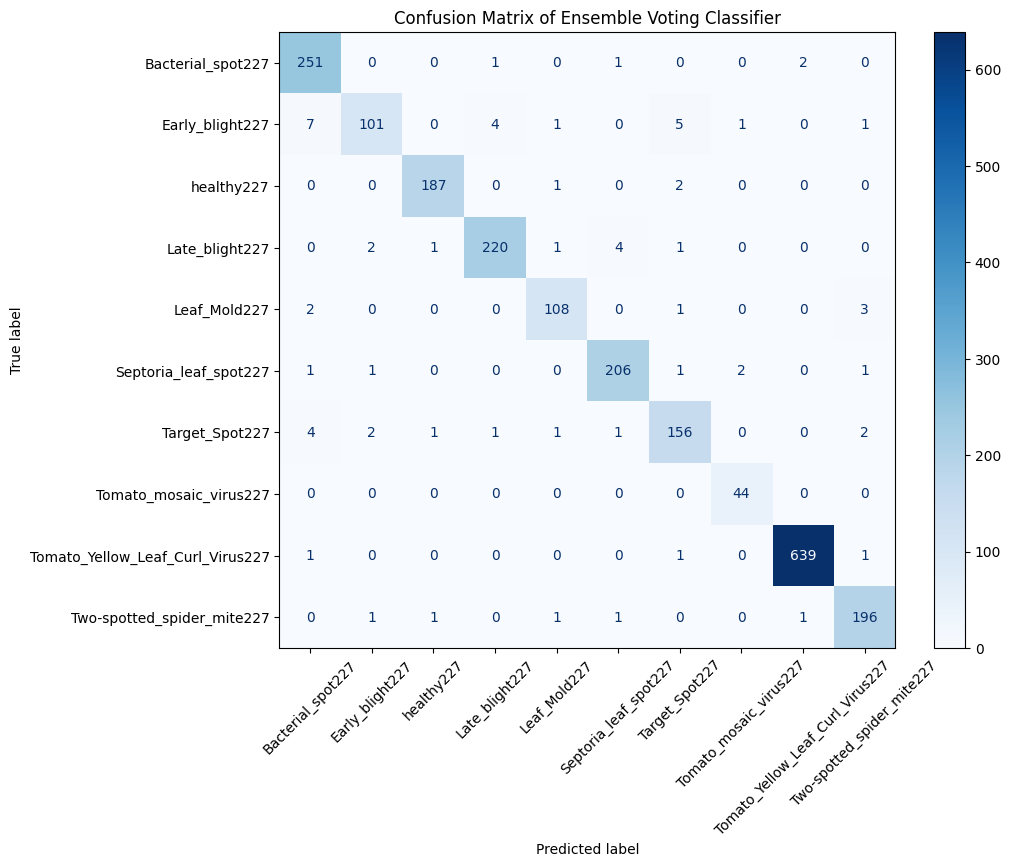

In [21]:
voting = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svm),
    ('mlp', mlp),
    ('lgbm', lgbm),
    ('rf', rf),
], voting='soft')

voting.fit(trainFeatures, trainLabels)
performace_measure(voting, testFeatures, testLabels, "Ensemble Voting Classifier")